<a href="https://colab.research.google.com/github/WhiteWolf088/Transfer_Learning_with_Tensorflow/blob/main/Transfer_Learning_Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine Tuning

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
A=zipfile.ZipFile('101_food_classes_10_percent.zip')
A.extractall()
A.close()

--2022-01-05 10:30:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   151MB/s    in 11s     

2022-01-05 10:31:04 (145 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [2]:
import pathlib
import numpy as np
data_dir=pathlib.Path('101_food_classes_10_percent/train')
class_names=np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [3]:
train_dir='101_food_classes_10_percent/train/'
test_dir='101_food_classes_10_percent/test/'

In [4]:
import tensorflow as tf
print('Traning Data  : ')
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               label_mode='categorical',
                                                               image_size=(224,224))
print('Testing Data  : ')
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=(224,224))

Traning Data  : 
Found 7575 files belonging to 101 classes.
Testing Data  : 
Found 25250 files belonging to 101 classes.


In [5]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation=tf.keras.models.Sequential([
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomFlip('horizontal')
],name='data_augmentation_layer')

# Functional API

In [6]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=tf.keras.Input(shape=(224,224,3),name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)
outputs=tf.keras.layers.Dense(101,activation='softmax',name='output_layer')(x)
model=tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
history=model.fit(train_data,
                  epochs=5,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=int(0.25*len(test_data)),
                  callbacks=[tf.keras.callbacks.ModelCheckpoint('101_food_classes_10_percent_checkponts',
                                                                save_best_only=True,
                                                                save_weights_only=True,
                                                                save_freq='epoch')])

Epoch 1/5
237/237 [==============================] - 146s 550ms/step - loss: 3.4807 - accuracy: 0.2488 - val_loss: 2.4259 - val_accuracy: 0.4562
Epoch 2/5
237/237 [==============================] - 104s 436ms/step - loss: 2.3394 - accuracy: 0.4593 - val_loss: 1.9841 - val_accuracy: 0.5143
Epoch 3/5
237/237 [==============================] - 94s 395ms/step - loss: 1.9764 - accuracy: 0.5300 - val_loss: 1.8273 - val_accuracy: 0.5343
Epoch 4/5
237/237 [==============================] - 92s 389ms/step - loss: 1.7652 - accuracy: 0.5695 - val_loss: 1.7464 - val_accuracy: 0.5508
Epoch 5/5
237/237 [==============================] - 88s 369ms/step - loss: 1.5985 - accuracy: 0.6073 - val_loss: 1.6895 - val_accuracy: 0.5612


In [9]:
model.evaluate(test_data)

790/790 [==============================] - 105s 133ms/step - loss: 1.7098 - accuracy: 0.5551


[1.709842562675476, 0.5551286935806274]

In [10]:
!wget https://raw.githubusercontent.com/WhiteWolf088/SomeHelperFunctions_TensorFlow/main/All_Functions_in_onefile_to_import.py

--2022-01-05 10:43:14--  https://raw.githubusercontent.com/WhiteWolf088/SomeHelperFunctions_TensorFlow/main/All_Functions_in_onefile_to_import.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘All_Functions_in_onefile_to_import.py’

All_Functions_in_on 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-05 10:43:14 (73.5 MB/s) - ‘All_Functions_in_onefile_to_import.py’ saved [10246/10246]



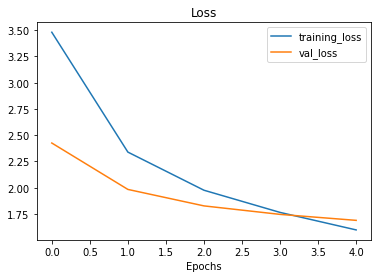

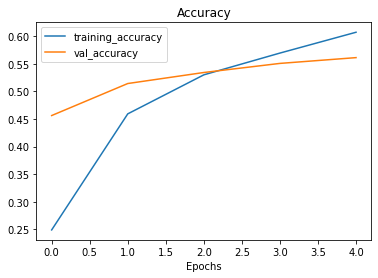

In [11]:
from All_Functions_in_onefile_to_import import plot_loss_curves, compare_historys
plot_loss_curves(history)

## Unfreezing last 10 layers in base_model

In [12]:
base_model.trainable=True
for layer in base_model.layers[:-10]:
  base_model.trainable=False

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [14]:
finetune_history=model.fit(train_data,
                           epochs=10,
                           initial_epoch=5,
                           steps_per_epoch=len(train_data),
                           validation_data=test_data,
                           validation_steps=int(0.25*len(test_data)),
                           callbacks=[tf.keras.callbacks.ModelCheckpoint('101_food_classes_10_percent_checkponts',
                                                                          save_best_only=True,
                                                                          save_weights_only=True,
                                                                          save_freq='epoch')])

Epoch 6/10
237/237 [==============================] - 95s 369ms/step - loss: 1.4346 - accuracy: 0.6573 - val_loss: 1.6657 - val_accuracy: 0.5676
Epoch 7/10
237/237 [==============================] - 81s 342ms/step - loss: 1.4042 - accuracy: 0.6643 - val_loss: 1.6541 - val_accuracy: 0.5701
Epoch 8/10
237/237 [==============================] - 78s 328ms/step - loss: 1.3953 - accuracy: 0.6672 - val_loss: 1.6507 - val_accuracy: 0.5734
Epoch 9/10
237/237 [==============================] - 79s 333ms/step - loss: 1.3676 - accuracy: 0.6760 - val_loss: 1.6487 - val_accuracy: 0.5727
Epoch 10/10
237/237 [==============================] - 76s 320ms/step - loss: 1.3670 - accuracy: 0.6717 - val_loss: 1.6470 - val_accuracy: 0.5709


In [15]:
model.evaluate(test_data)

790/790 [==============================] - 105s 132ms/step - loss: 1.6657 - accuracy: 0.5636


[1.6656912565231323, 0.563603937625885]

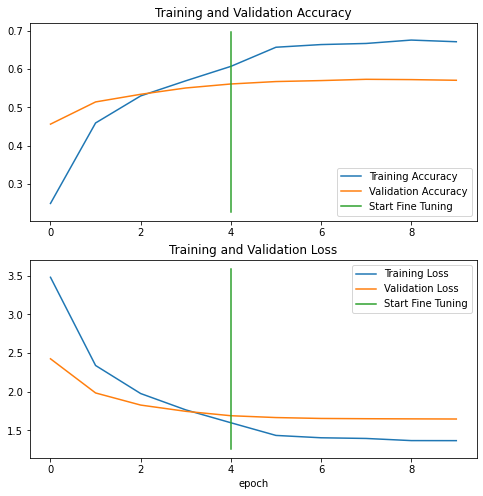

In [16]:
compare_historys(history,finetune_history)

In [17]:
model.save('Food_101_10_percent_data trained model.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


> * For next process see transfer learning scaling up notebook: